# Required installations 

In [ ]:
#!pip install torch
#!pip install tensorflow
#!pip install keras
#!pip install keras-rl2
#!pip install gym
#!pip install matplotlib
#!pip install numpy
#!pip install pandas
#!pip install stable_baselines3[extra]
#!pip install pygame

# Important imports 

In [20]:
import gymnasium as gym
from stable_baselines3 import DDPG, TD3, A2C, PPO
from stable_baselines3.common.noise import NormalActionNoise #importing Gaussian Noise
import os
import numpy as np
import torch

# Initializising environment 

In [3]:
env = gym.make('Pendulum-v1', g = 9.81, render_mode="rgb_array") #choose gym from https://gymnasium.farama.org/. Choose render mode "rgb_array" or choose "human" to visiualize the game but it will take more time until the action is done
env.reset() #clear the environment

print("sample action", env.action_space.sample()) #Value for action
print("observation space shape", env.observation_space.shape) #Tensor for possible states (In pendulum there are 3 states of the pendulum: x-,y coordinate and angular velocity)
print("sample observation", env.observation_space.sample()) #Actual values inside the Tensor (Since there are 3 states of the pendulum, the tensor includes 3 values of the states)


sample action [-0.02947027]
observation space shape (3,)
sample observation [-0.4079572   0.25272834 -0.5862485 ]


# Let the game be played without any sense 
## (Don't forget "human" Render Mode)

In [ ]:
episodes = 10 #initialise for loop
for episode in range(1, episodes + 1):
    state = env.reset()
    done = False
    score = 0

    while not done: #what to do in the for loop
        env.render() #render the process
        action = env.action_space.sample() #what action can be taken
        n_state, reward, terminated, truncated, info = env.step(action) #return of the parameters
        score += reward #sum of the reward
        done = terminated or truncated
        
    print("Episode:{} Score:{}".format(episode, score)) #print the number and the reward of the episode
    print("sample action", env.action_space.sample()) #Value for action
    print("sample observation", env.observation_space.sample()) #Actual values inside the Tensor (Since there are 3 states of the pendulum, the tensor includes 3 values of the states)

env.close()

In [ ]:
env.close()

# Building, training and saving a Model

In [5]:
models_dir = "models/Test" #making a Folder in your explorer with the data , dont forget to name your folder according to your model name
logdir = "logs" 

if not os.path.exists(models_dir):
    os.makedirs(models_dir)

if not os.path.exists(logdir):
    os.makedirs(logdir)
    
env.reset()

n_actions = env.action_space.shape[0]
action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))
model = DDPG("MlpPolicy", env, verbose = 1, tensorboard_log=logdir, action_noise=action_noise) #defining model as DDPG/TD3/A2C/PPO Model with given policy, environment, verbose = 1 for returning infos, sending infos to tensorboard and the noise for better exploration
#action_noise=action_noise cannot be applied to stochastic models like A2C or PPO!
TIMESTEPS = 10000 #defining when a model will be saved, in this case every 10000 steps
iters = 0
for i in range(20): #for 20 times 10000 = 200000 steps the model will learn.
    model.learn(total_timesteps=TIMESTEPS, reset_num_timesteps=False, tb_log_name="Test") #change the tb_log_name to create different folders in your explorer
    model.save(f"{models_dir}/{TIMESTEPS*i}")
#to see data in your tensorboard, open a terminal in your corresponding directory and type "tensorboard --logdir=logs" while the model is learning
#to load the data when you closed tensorboard type "tensorboard --logdir path/to/logs"
env.close()

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to logs\Test_0
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.63e+03 |
| time/              |           |
|    episodes        | 4         |
|    fps             | 210       |
|    time_elapsed    | 3         |
|    total_timesteps | 800       |
| train/             |           |
|    actor_loss      | 30        |
|    critic_loss     | 0.00997   |
|    learning_rate   | 0.001     |
|    n_updates       | 699       |
----------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.48e+03 |
| time/              |           |
|    episodes        | 8         |
|    fps             | 211       |
|    time_elapsed    | 7         |
|    total_timesteps | 1600      |
| train/             |           |
|    ac

KeyboardInterrupt: 

# Load the trained Model

In [ ]:
models_dir = "models/DDPG"
model_path = f"{models_dir}/180000.zip"
logdir = "logs" 

if not os.path.exists(models_dir):
    os.makedirs(models_dir)

if not os.path.exists(logdir):
    os.makedirs(logdir)
    
env = gym.make('Pendulum-v1', g = 9.81, render_mode="human") 
env.reset() 



model = DDPG.load(model_path, env = env)
print("observation space shape", env.observation_space.shape)
episodes = 10

for ep in range(episodes):
    obs = env.observation_space.sample()
    done = False
    while not done:
        env.render()
        action, _ = model.predict(obs)
        obs, reward, terminated, truncated, info = env.step(action)

In [ ]:
env.close()

# Evaluation of the Model

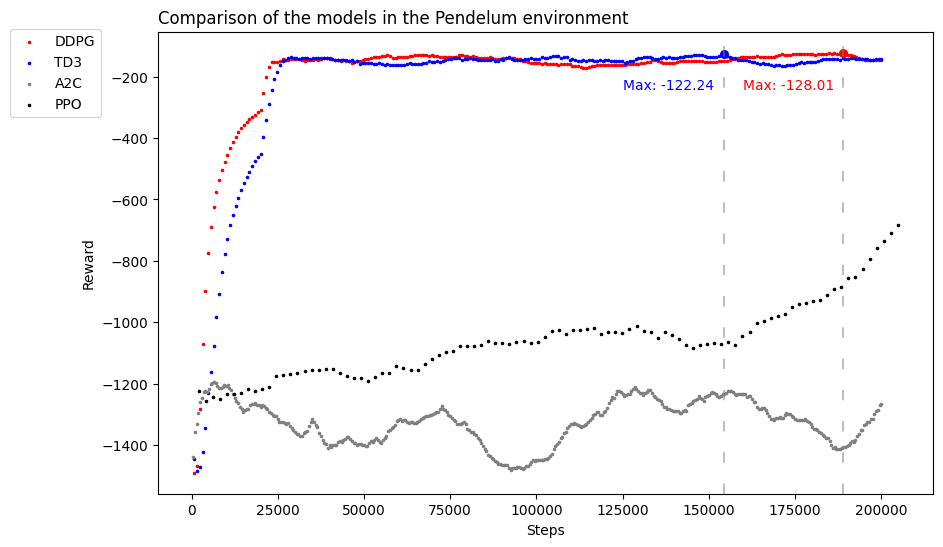

In [15]:
import pandas as pd 
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

df_DDPG = pd.read_csv('logs_DDPG_w_o_noise_03.09.24_0.csv') #define your data logs here
df_TD3 = pd.read_csv('logs_TD3_w_o_noise_03.09.24_0.csv')
df_A2C = pd.read_csv('logs_A2C_03.09.24_0.csv')
df_PPO = pd.read_csv('logs_PPO_03.09.24_0.csv')

plt.figure(figsize=(10, 6))


plt.scatter(df_DDPG.Step, df_DDPG.Value, marker = '.', color = 'red', s = 10, label='DDPG') #DIY your own diagram
plt.scatter(df_TD3.Step, df_TD3.Value, marker = '.', color = 'blue', s = 10, label='TD3')
plt.scatter(df_A2C.Step, df_A2C.Value, marker = '.', color = 'gray', s = 10, label='A2C')
plt.scatter(df_PPO.Step, df_PPO.Value, marker = '.', color = 'black', s = 10, label='PPO')

plt.title('Comparison of the models in the Pendelum environment', loc = 'left')

max_value_DDPG = df_DDPG.Value.max() #defining max values of the data logs to compare the models
max_step_DDPG = df_DDPG[df_DDPG.Value == max_value_DDPG].Step.values[0]
max_value_TD3 = df_TD3.Value.max()
max_step_TD3 = df_TD3[df_TD3.Value == max_value_TD3].Step.values[0]
plt.scatter(max_step_DDPG, max_value_DDPG, color='red', s=30, marker='o')
plt.annotate(f'Max: {max_value_DDPG:.2f}', (max_step_DDPG, max_value_DDPG), xytext=(125000, max_value_DDPG + -120), color = 'blue')
plt.scatter(max_step_TD3, max_value_TD3, color='blue', s=30, marker='o')
plt.annotate(f'Max: {max_value_TD3:.2f}', (max_step_TD3, max_value_TD3), xytext=(160000, max_value_DDPG + -120), color = 'red')
#plt.annotate(f'Max: {max_step_TD3:.2f}', (max_step_TD3, max_value_TD3)) #check step when max reward was recieved
#plt.annotate(f'Max: {max_step_DDPG:.2f}', (max_step_DDPG, max_value_DDPG)) #check step when max reward was recieved
plt.axvline(x=max_step_DDPG, color='gray', linestyle='--', alpha = 0.5, dashes=(5, 10))
plt.axvline(x=max_step_TD3, color='gray', linestyle='--', alpha = 0.5, dashes=(5, 10))


plt.xlabel('Steps')
plt.ylabel('Reward')

plt.legend(loc='center left', bbox_to_anchor=(-0.2, 0.91))

plt.show()

#### We are going to compare the different trained models in the Pendulum environment. We can see the recieved reward of the models on the y-axis and the amount of steps taken on the x-axis. The most rewards recieved the TD3 model on approximatly 154000 steps. The second most rewards recieved the DDPG model on approximatly 189000 steps. 
#### Overall the DDPG and the TD3 model learned the Pendulum Environment pretty fast compared to the A2C and the PPO models. Thanks to the actor-critic-architecture of the DDPG and TD3 the agents can remember previous rewards of previous steps and learn from the past. The A2C and PPO agents have no memory by default. That's why the DDPG and TD3 agents learn faster than the A2C and PPO agents.
#### The learning curve of the DDPG and TD3 model are similiar to each over but the learning curve of the DDPG model reached the convergence region faster than the TD3 model. This is because of the delayed critic network of the TD3 Agent (Or Twin Delayed DDPG Agent). In order to prevent greedy decisions of the actor the critic network updates itself less often than the DDPG critic. This can be a advantage in some cases but in this case this delayed the learning curve from reaching the convergence region.
#### Summa summarum the DDPG and the TD3 model learned the environment fast and managed to solve the task. The A2C and PPO models have to be trained more steps in order to learn what to do with the pendulum.

# Using a custom environment

#### Let's explore a custom environment for our next challenge. We'll simulate a Permanent Magnet Synchronous Motor (PMSM) and train two agents, DDPG and TD3, to control the motor's current, with the objective of maximizing torque output. Thankfully clever people have already developed a custom environment for this simulation. In this section, we'll follow the approach outlined on the Gym Electric Motor (GEM) GitHub page. For more detailed information, visit: https://github.com/upb-lea/gym-electric-motor.

In [22]:
!pip install gym-electric-motor

     ---------------------------------------- 0.0/626.2 kB ? eta -:--:--
     ------------------------------------- 626.2/626.2 kB 11.7 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/44.8 MB ? eta -:--:--
   -- ------------------------------------- 2.4/44.8 MB 12.2 MB/s eta 0:00:04
   ---- ----------------------------------- 5.0/44.8 MB 12.6 MB/s eta 0:00:04
   ------ --------------------------------- 7.6/44.8 MB 12.7 MB/s eta 0:00:03
   --------- ------------------------------ 10.5/44.8 MB 12.8 MB/s eta 0:00:03
   ----------- ---------------------------- 13.1/44.8 MB 12.8 MB/s eta 0:00:03
   -------------- ------------------------- 15.7/44.8 M

In [98]:
import gym_electric_motor as gem
from gym_electric_motor.reference_generators import LaplaceProcessReferenceGenerator
from gym_electric_motor.visualization import MotorDashboard
from gym_electric_motor.core import Callback
from gymnasium.spaces import Discrete, Box
from gymnasium.wrappers import FlattenObservation, TimeLimit
from gymnasium import ObservationWrapper
from pathlib import Path

In [168]:
class RewardLogger(Callback): 
    """Logs the reward accumulated in each episode"""
    def __init__(self):
        self.step_rewards = []
        self.mean_episode_rewards = []
        dir_path = Path.cwd() /"PMSM_simulation" / "saved_agents" #change directory names as you wish
        dir_path.mkdir(parents=True, exist_ok=True)
        self.fpath = dir_path  / "EpisodeRewards.npy"
        
    def on_step_end(self, k, state, reference, reward, done):
        """Stores the received reward at each step"""
        self.step_rewards.append(reward)
    
    def on_reset_begin(self):
        """Stores the mean reward received in every episode"""
        if len(self.step_rewards) > 0:
            self.mean_episode_rewards.append(np.mean(self.step_rewards))
        self.step_rewards = []
        
    def on_close(self):
        """Writes the mean episode reward of the experiment to a file."""
        np.save(self.fpath, np.array(self.mean_episode_rewards))

class FeatureWrapper(ObservationWrapper):
    """
    Wrapper class which wraps the environment to change its observation. Serves
    the purpose to improve the agent's learning speed.
    
    It changes epsilon to cos(epsilon) and sin(epsilon). This serves the purpose
    to have the angles -pi and pi close to each other numerically without losing
    any information on the angle.
    
    Additionally, this wrapper adds a new observation i_sd**2 + i_sq**2. This should
    help the agent to easier detect incoming limit violations.
    """

    def __init__(self, env, epsilon_idx, i_sd_idx, i_sq_idx):
        """
        Changes the observation space to fit the new features
        
        Args:
            env(GEM env): GEM environment to wrap
            epsilon_idx(integer): Epsilon's index in the observation array
            i_sd_idx(integer): I_sd's index in the observation array
            i_sq_idx(integer): I_sq's index in the observation array
        """
        super(FeatureWrapper, self).__init__(env)
        self.EPSILON_IDX = epsilon_idx
        self.I_SQ_IDX = i_sq_idx
        self.I_SD_IDX = i_sd_idx
        new_low = np.concatenate((self.env.observation_space.low[     
                                  :self.EPSILON_IDX], np.array([-1.]),
                                  self.env.observation_space.low[
                                  self.EPSILON_IDX:], np.array([0.])))
        new_high = np.concatenate((self.env.observation_space.high[
                                   :self.EPSILON_IDX], np.array([1.]),
                                   self.env.observation_space.high[
                                   self.EPSILON_IDX:],np.array([1.])))

        self.observation_space = Box(new_low, new_high)

    def observation(self, observation):
        """
        Gets called at each return of an observation. Adds the new features to the
        observation and removes original epsilon.
        
        """
        cos_eps = np.cos(observation[self.EPSILON_IDX] * np.pi)
        sin_eps = np.sin(observation[self.EPSILON_IDX] * np.pi)
        currents_squared = observation[self.I_SQ_IDX]**2 + observation[self.I_SD_IDX]**2
        observation = np.concatenate((observation[:self.EPSILON_IDX],
                                      np.array([cos_eps, sin_eps]),
                                      observation[self.EPSILON_IDX + 1:],
                                      np.array([currents_squared])))
        return observation


In [164]:
# define motor arguments
motor_parameter = dict(
    p=3,  # [p] = 1, nb of pole pairs
    r_s=17.932e-3,  # [r_s] = Ohm, stator resistance
    l_d=0.37e-3,  # [l_d] = H, d-axis inductance
    l_q=1.2e-3,  # [l_q] = H, q-axis inductance
    psi_p=65.65e-3,  # [psi_p] = Vs, magnetic flux of the permanent magnet
)
# supply voltage
my_changed_voltage_supply_args = {'u': 400.0},

# Replace the reference generator by passing a new instance
my_new_ref_gen_instance = LaplaceProcessReferenceGenerator(
    reference_state='i_sq',
    sigma_range=(1e-3, 1e-2)
)

# nominal and absolute state limitations
nominal_values=dict(
    omega=418.879,
    i=230,
    u=400.0
)
limit_values=dict(
    omega=418.879,
    i=345,
    u=400.0
)

# sampling interval
tau = 1e-5

# define maximal episode steps
max_eps_steps = 10000

# Select a different ode_solver with default parameters by passing a keystring
#my_overridden_solver = 'scipy-solve_ivp', 


motor_initializer = {'random_init': 'uniform', 'interval': np.array([[-230, 230], [-230, 230], [-np.pi, np.pi]])}
reward_function=gem.reward_functions.WeightedSumOfErrors(
    reward_weights={'i_sq': 10, 'i_sd': 10},
    gamma=0.99,  # discount rate 
    reward_power=1
)
reward_logger = RewardLogger()
motor_dashboard = MotorDashboard(state_plots=['i_sq', 'i_sd'], reward_plot=True)
# creating gem environment
env = gem.make(  # define a PMSM with discrete action space
    'Cont-CC-PMSM-v0',
    # visualize the results
    visualization=motor_dashboard,
    voltage_supply=my_changed_voltage_supply_args,
    reference_generator=my_new_ref_gen_instance,
    
    # parameterize the PMSM and update limitations
    motor=dict(
        motor_parameter=motor_parameter,
        limit_values=limit_values,
        nominal_values=nominal_values,
        motor_initializer=motor_initializer,
    ),
    # define the random initialisation for load and motor
    load=dict(
        load_initializer={'random_init': 'uniform', },
    ),
    reward_function=reward_function,
    supply=dict(u_nominal=u_supply),
    # define the duration of one sampling step
    tau=tau,
    callbacks=(reward_logger,),
    ode_solver='euler',
)

# remove one action from the action space to help the agent speed up its training
# this can be done as both switchting states (1,1,1) and (-1,-1,-1) - which are encoded
# by action 0 and 7 - both lead to the same zero voltage vector in alpha/beta-coordinates
env.action_space = Box(low=np.array([-1.0, -1.0, -1.0]), high=np.array([1.0, 1.0, 1.0]), dtype=np.float32) #Discrete(8)

# applying wrappers
eps_idx = env.physical_system.state_names.index('epsilon')
i_sd_idx = env.physical_system.state_names.index('i_sd')
i_sq_idx = env.physical_system.state_names.index('i_sq')
env = TimeLimit(
    FeatureWrapper(
        FlattenObservation(env), 
        eps_idx, i_sd_idx, i_sq_idx
    ),
    max_eps_steps
)
print(env.action_space)


Box(-1.0, 1.0, (3,), float32)


In [144]:
buffer_size = 200000 #number of old obsersation steps saved
learning_starts = 10000 # memory warmup
train_freq = 1 # prediction network gets an update each train_freq's step
batch_size = 25 # mini batch size drawn at each update step
policy_kwargs = {
        'net_arch': [64,64] # hidden layer size of MLP
        }
exploration_fraction = 0.1 # Fraction of training steps the epsilon decays 
target_update_interval = 1000 # Target network gets updated each target_update_interval's step
gamma = 0.99
verbose = 1 # verbosity of stable-basline's prints
tau = 1e-5
simulation_time = 5 # seconds
nb_steps = int(simulation_time // tau)

In [166]:
logdir = "PMSM_simulation/logs"

model = DDPG("MlpPolicy", env, buffer_size=buffer_size, learning_starts=learning_starts ,train_freq=train_freq, 
            batch_size=batch_size, gamma=gamma, policy_kwargs=policy_kwargs, 
            verbose=verbose, tensorboard_log=logdir)

for i in range(20):
    model.learn(total_timesteps=nb_steps, reset_num_timesteps=False, tb_log_name="DDPG_PMSM")
    model.save(f"{dir_path}/{total_timesteps*i}")

env.close()

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to PMSM_simulation/logs\DDPG_PMSM_0
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 2.78e+03  |
|    ep_rew_mean     | -1.24e+04 |
| time/              |           |
|    episodes        | 4         |
|    fps             | 1200      |
|    time_elapsed    | 9         |
|    total_timesteps | 11137     |
| train/             |           |
|    actor_loss      | 17        |
|    critic_loss     | 0.102     |
|    learning_rate   | 0.001     |
|    n_updates       | 1136      |
----------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.57e+03  |
|    ep_rew_mean     | -7.73e+03 |
| time/              |           |
|    episodes        | 8         |
|    fps             | 747       |
|    time_elapsed    | 16        |
|    total_timesteps | 12539     |
| train/             

NameError: name 'dir_path' is not defined